# Data & Analytics Case Study

**Role**: CSRAnalyst - CSR

**Data Location**: [Case Study - Data and Analytics](https://www.google.com/url?sa=D&q=https://drive.google.com/drive/folders/16cxs2hR-thTQZ4DGHH5VJWYQzqZ6agtt&ust=1644153120000000&usg=AOvVaw2temyT4hAhJNqqDfoOwBtY&hl=en-GB)

**Submission Time**: Within 7 days

# By Roos Rabenberg

14-02-2022

<Presentation link>

## Data Definitions
**Customer ID**: Unique ID per customer

**Session ID:** Unique ID per sessions

**Login ID**: Assigned on customer login

**Platform ID**: platform of session i.e android, iOS, mweb,dweb

**Duration**: Duration of every session

**Transaction ID**: Unique ID Data captured on successful transaction on Web and app

**Order ID**: Unique ID for every order entering operational system

**Funnel Level**: Depth of funnel reached by a user in a session

**Value**: Order value is denominated in integers at the lowest unit. e.g. 5000 GBP => 50 GBP (because the lowest
unit in GBP is a penny, w/ 100 pence = 1 GBP)
currency_details.csv a table with iso codes and exponents for currencies

- **exponent** column can be used to convert the integer amounts in the transactions table into cash amounts.
(e.g for 5000 GBP, exponent = 2, so we apply: 5000/(10^2) = 50 GBP


![ER Diagram.png](https://drive.google.com/uc?export=view&id=1iPN1R7gHZo7vsxCa1b8GzwefY7T6q9oH)



Above dataset is generated by an online food delivery business ‘Kaboom’ spread across multiple countries. Please help us understand more about the business in general from the following questions. Please focus on the logical explanation of your answer. You can use any tool of your choice to load/unload/query/analyze/visualize the data. Please present your findings within 8 slides (including title) and share the code within 7 day of receiving the case study.

**Questions**
1. Provide an exploratory analysis of the dataset answering the following
- Define consumers who have the highest intent of purchase and which is the
most cost effective channel to target them?
- What is the overall health of business and why? Which country contributes
most to the bottomline and why?
- Which cities provide an opportunity for Kaboom?
2. Kaboom wants to drive sustainability across the markets they operate in. Based on
the current datasets, can you think of any KPIs to focus on. What additional data
points would you add to the datasets and why (choose the top-3).

# Import & Explore Dataset

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# connect with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exporatory Analysis - Part 1
## *Define consumers who have the highest intent of purchase and which is the most cost effective channel to target them?*


In this project, I'll build customer segments to indicate purchase intention for Kaboom. The objective of this analysis is to explore the data based on Recency, Frequency, Monetary (RFM) model. However I adapted it to the Duration, Sessions, Orders and Value (RFM) score. This is because the RFM score focusses on maximising retention based on revenue data only and the RFM score also includes user session data, meaning we add user activity as one of the predictors of purchase intention.


Useful columns are:
- **Recency**: represents the amount of days since the last order. This is equal to the duration between a customer’s first purchase and their latest purchase. (Thus if they have made only 1 purchase, the recency is 0.)
- **Frequency**: number of transactions made over a given period
- **Monetary_value**: represents the average value of a given customer’s purchases. This is equal to the sum of all a customer’s purchases divided by the total number of purchases.
--------- **Lifetime**: represents the amount of days  of the customer in whatever time units chosen (daily in this casse). This is equal to the duration between a customer’s first session and the end of the period under study.


**Limitations:**
- This analysis only focusses on current customers. Future analysis could include the potential consumers that haven't purchased with Kaboom yet


*Research that shows 'duration' is an important factor of Purchase Intention:
https://link.springer.com/article/10.1007/s12525-020-00448-x*

The data available has been modified and merged using MySQL. Find the queries [here](https://drive.google.com/file/d/13cowSNwBrnPkWMtYKiAiI35R2V8CLIhz/view?usp=sharing)

In [3]:
# Import modified consumer data
path = "/content/drive/MyDrive/Work/Job Searching/Assesments/Take Away/Case/Data/Modified/rfm.csv"
data  = pd.read_csv(path, low_memory=False, sep=";")
data.head()

,customerid,transaction_id,Recency,Frequency,MonetaryValue,channel_id
0,74433d98854683225bac223359103b2b52a1bc9d,ccf7fc20892ff48d5c2412e1975c2c9e9bc01ca3,0,2,2032.0,1
1,f2d20659566c24c1024b08da9d1cac736ca639a8,b4c1a490fa1b1fc4f43136fefd9a450011c72b56,0,2,952.0,1
2,a6d9cf0b17e035c59f9ceff51be5a3cd1abd9885,c98515aae37a16eb813adf0f683b959823e89f25,0,2,472.0,1
3,dfabfe5818bafc7e2fcf8e0ebb4f1cca29c0d8c6,5cb2398f1256dad4205c66d4158993ca7b96a0cb,0,2,186.0,1
4,e1b32decb677b8a8bf58819a9b6460692fb0ac14,2f824c772a7be03688595b12da39cf6c7290ad65,0,2,2690.0,1


Let's start by looking at the shape of our data and the column types.

In [4]:
# Print shape of data
print(data.shape)

(1000000, 6)


In [5]:
# Check data types
data.dtypes

customerid         object
transaction_id     object
Recency             int64
Frequency           int64
MonetaryValue     float64
channel_id          int64
dtype: object

We should also look at the summary statistics for all the numeric columns using the describe function.

In [6]:
# Show statistics on the current data 
data.describe()

,Recency,Frequency,MonetaryValue,channel_id
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,36.554273,1.675868,1677.317463,1.699583
std,76.408512,0.468050,1859.114301,3.089008
min,0.000000,1.000000,0.000000,-1.000000
25%,0.000000,1.000000,228.000000,1.000000
50%,0.000000,2.000000,1188.000000,1.000000
75%,19.000000,2.000000,2456.000000,2.000000
max,367.000000,2.000000,69642.000000,18.000000


In [7]:
# Check for na or missing data
data.isna().sum()

customerid        0
transaction_id    0
Recency           0
Frequency         0
MonetaryValue     0
channel_id        0
dtype: int64

## Exploring the Variables

In [8]:
# Check recency
data["Recency"].value_counts()

# Check recency percentage
data["Recency"].value_counts(normalize=True)

0      0.722897
7      0.001929
14     0.001740
21     0.001646
8      0.001622
         ...   
364    0.000041
362    0.000034
365    0.000018
366    0.000015
367    0.000004
Name: Recency, Length: 368, dtype: float64

In [9]:
# Check recency
data["Frequency"].value_counts()

# Check recency percentage
data["Frequency"].value_counts(normalize=True)

2    0.675868
1    0.324132
Name: Frequency, dtype: float64

As you can see above, 85% only bought once.

In [10]:
data.columns
data.describe()

data['MonetaryValue'] = data.mean(numeric_only=True, axis=1)
data.describe()
# # Inspect null values
# null_cols = data.isnull().sum()
# null_cols

,Recency,Frequency,MonetaryValue,channel_id
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,36.554273,1.675868,429.311797,1.699583
std,76.408512,0.468050,465.052384,3.089008
min,0.000000,1.000000,0.000000,-1.000000
25%,0.000000,1.000000,70.406399,1.000000
50%,0.000000,2.000000,308.000000,1.000000
75%,19.000000,2.000000,625.000000,2.000000
max,367.000000,2.000000,17435.500000,18.000000


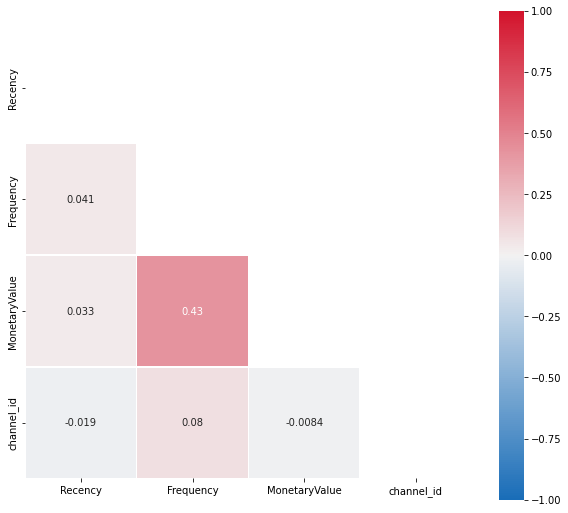

In [11]:
# Create correlation heatmap
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(250, 10, s=95, l=45,n=9, center="light", as_cmap=True)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,square=True, linewidths=.5, 
                cbar_kws={"shrink": .9}, annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


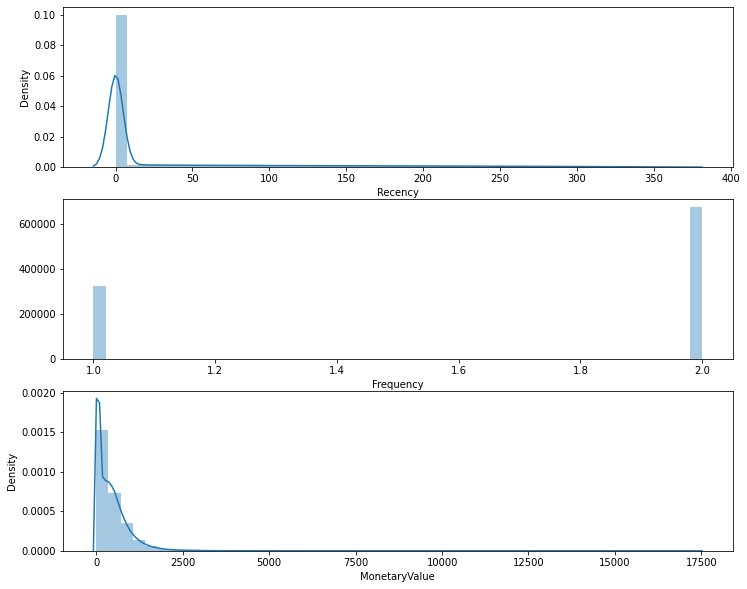

In [12]:
# Plot RFM distributions
plt.figure(figsize=(12,10))

# Plot distribution of Recency
plt.subplot(3, 1, 1); sns.distplot(data['Recency'])

# Plot distribution of Frequency
plt.subplot(3, 1, 2); sns.distplot(data['Frequency'],kde=False)

# Plot distribution of MonetaryValue
plt.subplot(3, 1, 3); sns.distplot(data['MonetaryValue'])

# Show the plot
plt.show()

These plots show us the distribution of the variables. `Recency` is not at all normaly distributed, it is very skewed to the right. `Frequency` is extremely skewed to the right, meaning most people just purchase once. `MonetaryValue` is also skewed to the right, which is in line with the one-purchase insight.

## Calculate the R, F and M scores

At this point, I have the values for Recency, Frequency and Monetary parameters. Each customer will get a note between 1 and 5 for each parameter.
We can do this by setting ranges based on expected behavior. For example, to rate Recency, we could use this scale:
    * 1: 0-30 days
    * 2: 31-60 days
    * 3: 61-90 days
    * 4: 91-180 days
    * 5: 181-365 days

We could also use quintiles. Each quintiles contains 20% of the population. Using quintiles is more flexible as the ranges will adapt to the data and would work across different industries or if there's any change in expected customer behavior.
I am going to use the quintiles method. First, I get the quintiles for each parameter.

Resource: https://guillaume-martin.github.io/rfm-segmentation-with-python.html

In [13]:
# Rename dataframe
rfm = data

# Create the quartiles scores
quantiles = data.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
    
def RFMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
rfm['R'] = rfm['Recency'].apply(RFMScore, args=('Recency',quantiles,))
rfm['F'] = rfm['Frequency'].apply(RFMScore, args=('Frequency',quantiles,))
rfm['M'] = rfm['MonetaryValue'].apply(RFMScore, args=('MonetaryValue',quantiles,))

# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)

# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

# Create human friendly RFM labels
segt_map = {
    r'[1-2][1-2]': 'New customers',
    r'[1-2][2-3]': 'At risk',
    r'[1-2]4': 'Can\'t loose them',
    r'2[1-2]': 'About to sleep',
    r'22': 'Need attention',
    r'[2-3][3-4]': 'Loyal customers',
    r'31': 'Promising',
    r'41': 'Hibernating',
    r'[3-4][1-2]': 'Potential loyalists',
    r'4[3-4]': 'Champions'
}
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

# List the head of the table to view the 
rfm.head(5)


# Source : https://futurice.com/blog/know-your-customers-with-rfm

,customerid,transaction_id,Recency,Frequency,MonetaryValue,channel_id,R,F,M,RFM_Segment,RFM_Score,Segment
0,74433d98854683225bac223359103b2b52a1bc9d,ccf7fc20892ff48d5c2412e1975c2c9e9bc01ca3,0,2,508.75,1,1,2,3,123,6,New customers
1,f2d20659566c24c1024b08da9d1cac736ca639a8,b4c1a490fa1b1fc4f43136fefd9a450011c72b56,0,2,238.75,1,1,2,2,122,5,New customers
2,a6d9cf0b17e035c59f9ceff51be5a3cd1abd9885,c98515aae37a16eb813adf0f683b959823e89f25,0,2,118.75,1,1,2,2,122,5,New customers
3,dfabfe5818bafc7e2fcf8e0ebb4f1cca29c0d8c6,5cb2398f1256dad4205c66d4158993ca7b96a0cb,0,2,47.25,1,1,2,1,121,4,New customers
4,e1b32decb677b8a8bf58819a9b6460692fb0ac14,2f824c772a7be03688595b12da39cf6c7290ad65,0,2,673.25,1,1,2,4,124,7,New customers


In [14]:
rfm["Segment"].value_counts()

New customers          722897
Potential loyalists    195029
Hibernating             73093
Promising                8981
Name: Segment, dtype: int64

In [15]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_segment_agg = rfm.groupby('Segment').agg({
    'Recency': ['min','max'],
    'Frequency': ['min','max'],
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
rfm_segment_agg

Recency      Frequency     MonetaryValue        
                        min  max       min max          mean   count
Segment                                                             
Hibernating              20  366         1   1         174.5   73093
New customers             0    0         1   2         425.5  722897
Potential loyalists       1  367         2   2         552.6  195029
Promising                 1   19         1   1         128.9    8981

The RFM scores give us 53 = 125 segments. Which is not easy to work with.
I am going to work with 11 segments based on the R and F scores. Here is the description of the segments:

Segment:	Description
- Champions:	Bought recently, buy often and spend the most
- Loyal Customers:	Buy on a regular basis. Responsive to promotions.
- Potential Loyalist:	Recent customers with average frequency.
- Recent Customers:	Bought most recently, but not often.
- Promising:	Recent shoppers, but haven’t spent much.
- Customers Needing Attention:	Above average recency, frequency and monetary values. May not have bought very recently though.
- About To Sleep:	Below average recency and frequency. Will lose them if not reactivated.
- At Risk	Purchased often but a long time ago. Need to bring them back!
- Can’t Lose Them:	Used to purchase frequently but haven’t returned for a long time.
- Hibernating:	Last purchase was long back and low number of orders. May be lost.

# Visualise customer segments
Now that we have our scores, we can do some data visualization to get a better idea of our customers portfolio. First, let see at the distribution of R, F and M.

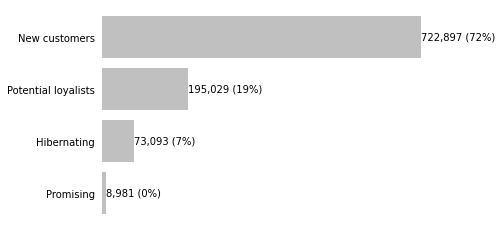

In [16]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

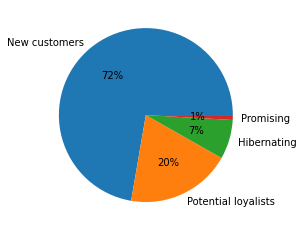

In [17]:
plt.pie(rfm.Segment.value_counts(),
        labels=rfm.Segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
# Save segment data to a new csv file
rfm.to_csv('/content/drive/MyDrive/Work/Job Searching/Assesments/Take Away/Case/Data/Modified/segments.csv',index=False)

Consumers with the highest purchase intention are the ones the "champions".

# Exporatory Analysis - Part 2
## *Which is the most cost effective channel to target the consumers with the highest purchase intention?*

**Data definitions**

- The revenue is the sum of commission revenue and revenue categorized as 'other'

- The costs are a sum from marketing costs, operational costs and administrational costs.

*The data available has been modified and merged using MySQL. Find the queries [here](https://drive.google.com/file/d/13cowSNwBrnPkWMtYKiAiI35R2V8CLIhz/view?usp=sharing)*

In [ ]:
# Import modified channel_segment
path = "/content/drive/MyDrive/Work/Job Searching/Assesments/Take Away/Case/Data/Modified/channel_segment.csv"
data  = pd.read_csv(path, low_memory=False, sep=";")
data.head()

,channel_name,cost,revenue,crr
0,channel1,8370.600850,55628.444422,0.150473
1,channel90,664.000000,3110.000000,0.213505
2,channel36,145.069881,612.102322,0.237003
3,channel19,166.000000,636.000000,0.261006
4,channel2,35.435313,118.358766,0.299389


The results show that the most cost effective channel is 'channel1'. The CRR is 15%, meaning that from 100% of the revenue generated, 'only' 15% are costs. The least cost effective channel is 'channel2', which needs double the cost, namely 30% in order to generate revenue for consumers with the highest purchase intention.